In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [2]:
df = pd.read_csv('DataFrame')
X = pd.read_csv('clean_data')

In [3]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,69,0,0,964,3,2,3,3,...,2,5,5,3,5,1,5,3,0,0
1,0,0,55,1,2,240,2,5,5,5,...,2,1,1,2,3,2,3,2,163,0
2,1,0,51,1,2,2672,5,5,5,5,...,1,4,4,4,4,5,4,3,0,1
3,0,1,27,1,0,495,2,3,2,2,...,3,3,4,4,3,4,2,3,0,0
4,0,0,12,0,0,462,2,4,2,3,...,2,2,3,4,2,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,49,0,0,1587,3,4,3,4,...,5,4,4,3,5,3,4,5,35,0
5996,1,0,33,0,0,588,2,5,2,3,...,5,5,5,3,5,5,5,5,0,0
5997,0,0,50,0,0,2358,1,4,1,5,...,4,4,4,5,4,4,3,4,0,0
5998,0,0,35,0,0,672,2,3,2,2,...,5,5,1,1,4,4,1,5,0,0


In [4]:
X.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.507667,0.180000,39.101000,0.689167,1.020833,1197.438167,2.703667,3.065167,2.737833,2.968333,...,3.448167,3.356833,3.374500,3.370167,3.631833,3.305833,3.638667,3.284500,14.808667,0.429500
std,0.499983,0.384219,15.172931,0.462873,0.962230,993.931490,1.346039,1.518762,1.402651,1.272635,...,1.330767,1.339578,1.294937,1.312160,1.181744,1.260779,1.172035,1.323197,37.784927,0.495046
min,0.000000,0.000000,7.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,425.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,1.000000,1.000000,861.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,50.000000,1.000000,2.000000,1732.250000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,1.000000


In [5]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [6]:
G = nx.from_numpy_matrix(A)

In [7]:
nx.is_connected(G)

True

In [8]:
#nx.draw(G,node_size=20)

In [9]:
features = pd.Series(X.satisfaction) 

In [10]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [11]:
pos = nx.spring_layout(G)

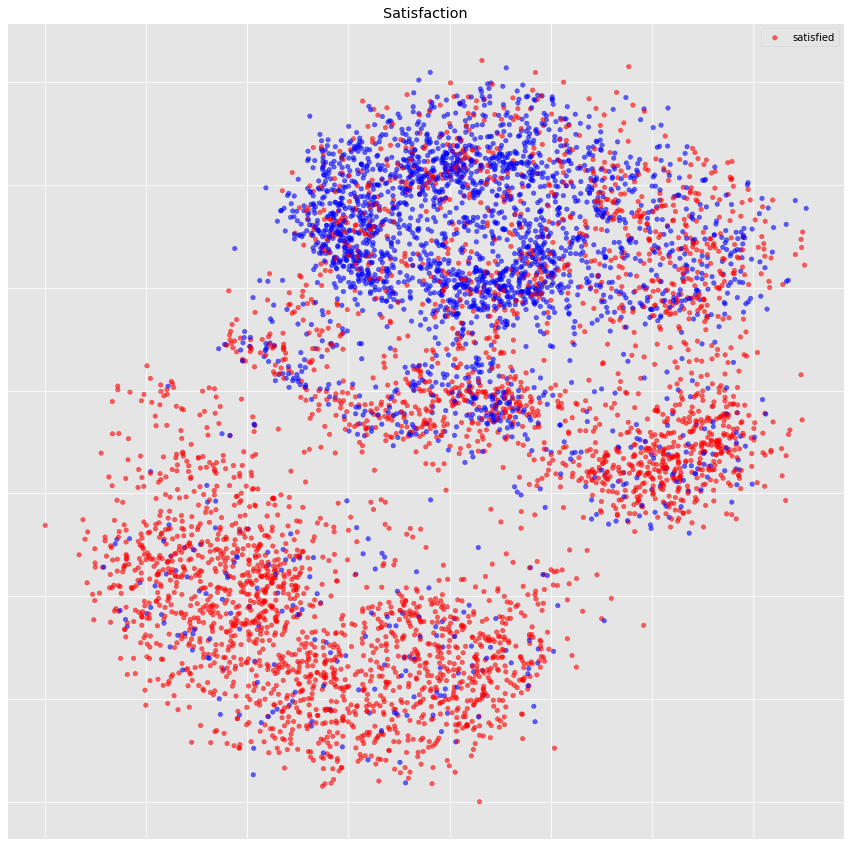

In [12]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend(['satisfied' ,'dissatisfied or neutral'])
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

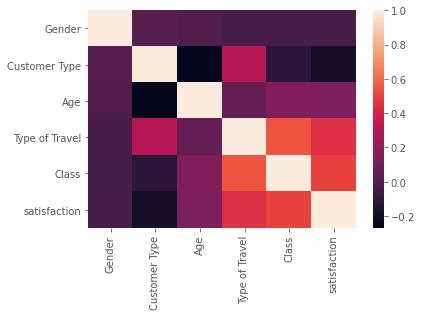

In [13]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [14]:
colmapvar = pd.Series(X['Gender']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


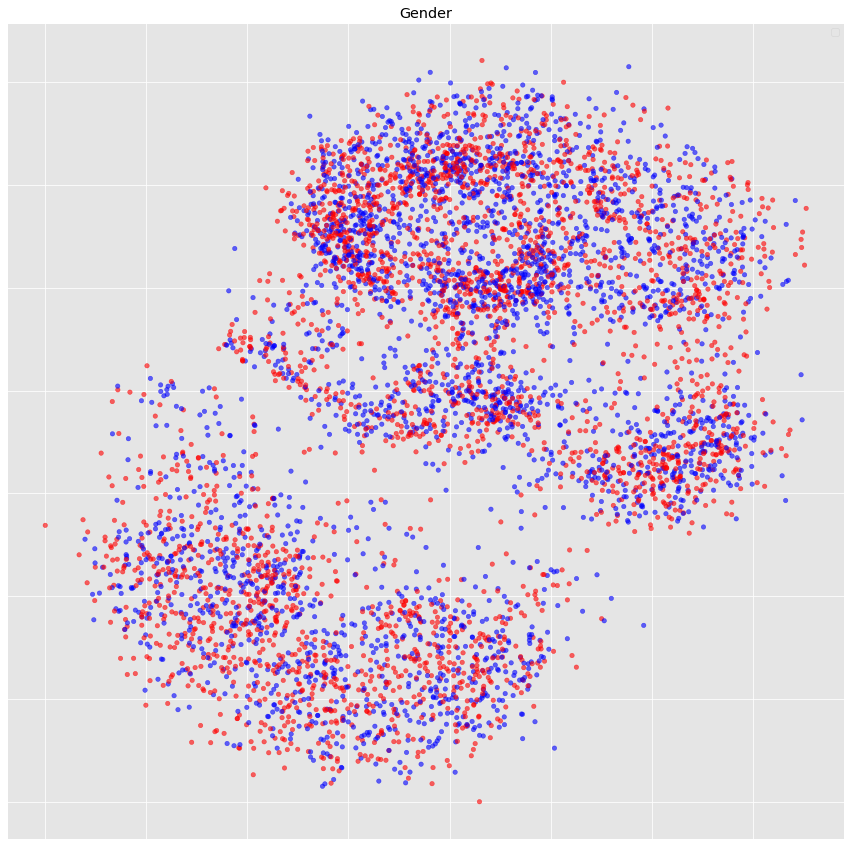

In [15]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Gender')
plt.show()

In [16]:
colmapvar = pd.Series(X['Customer Type']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


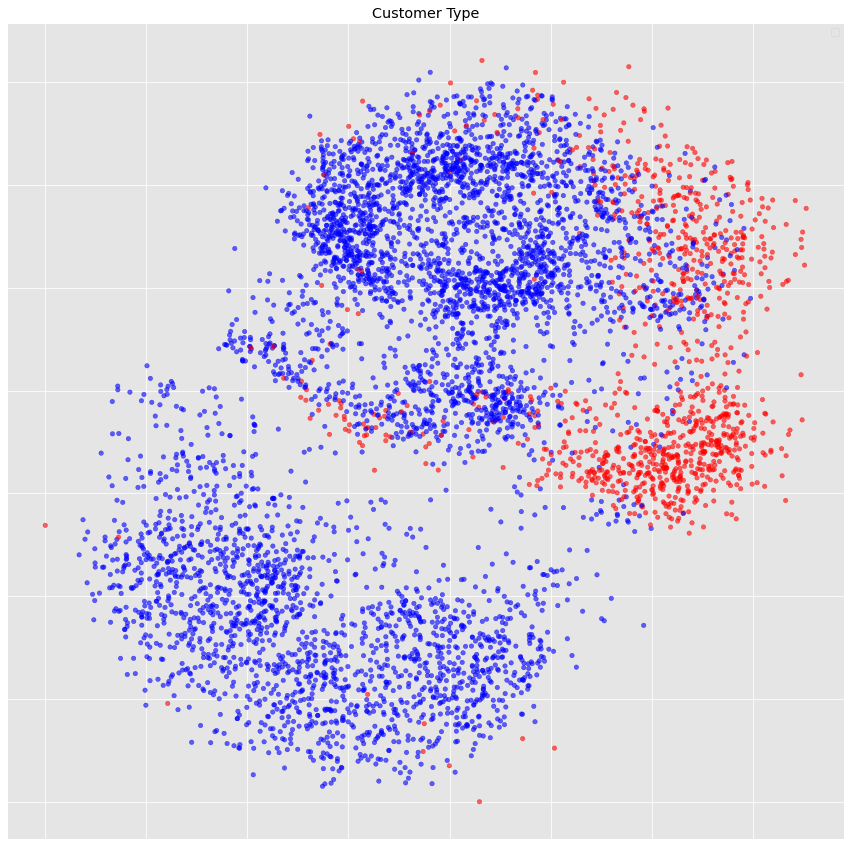

In [17]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Customer Type')
plt.show()

In [18]:
colmapvar = pd.Series(X['Class']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    else:
        color_map.append('green')

No handles with labels found to put in legend.


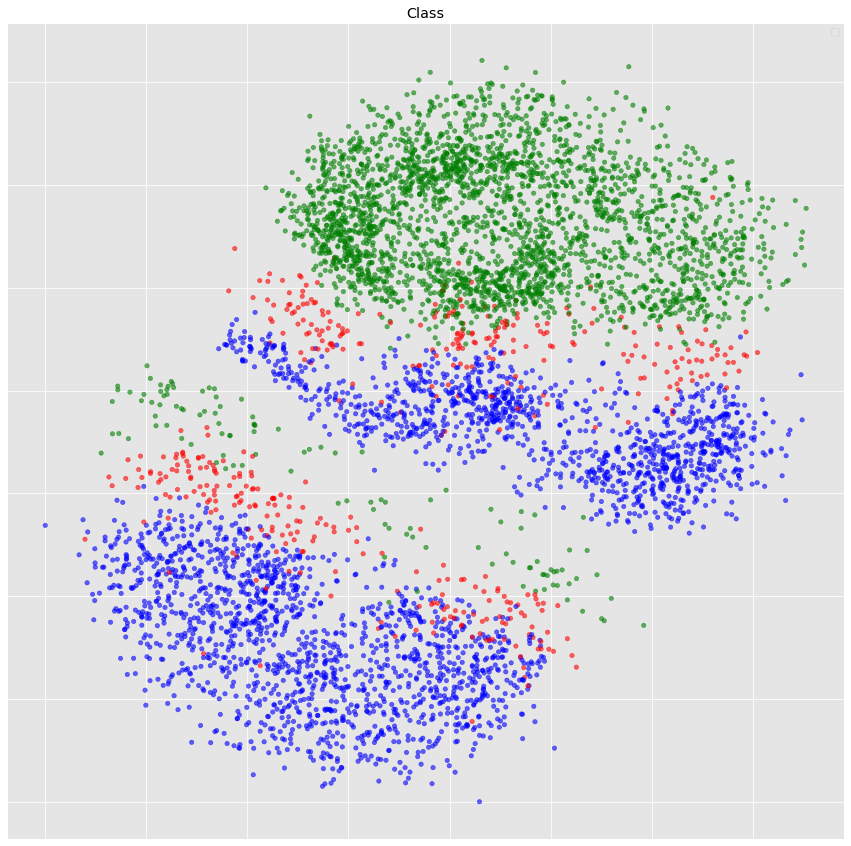

In [19]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Class')
plt.show()

In [20]:
colmapvar = pd.Series(X['Type of Travel']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')


In [21]:
colmapvar.describe()

count    6000.000000
mean        0.689167
std         0.462873
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Type of Travel, dtype: float64

No handles with labels found to put in legend.


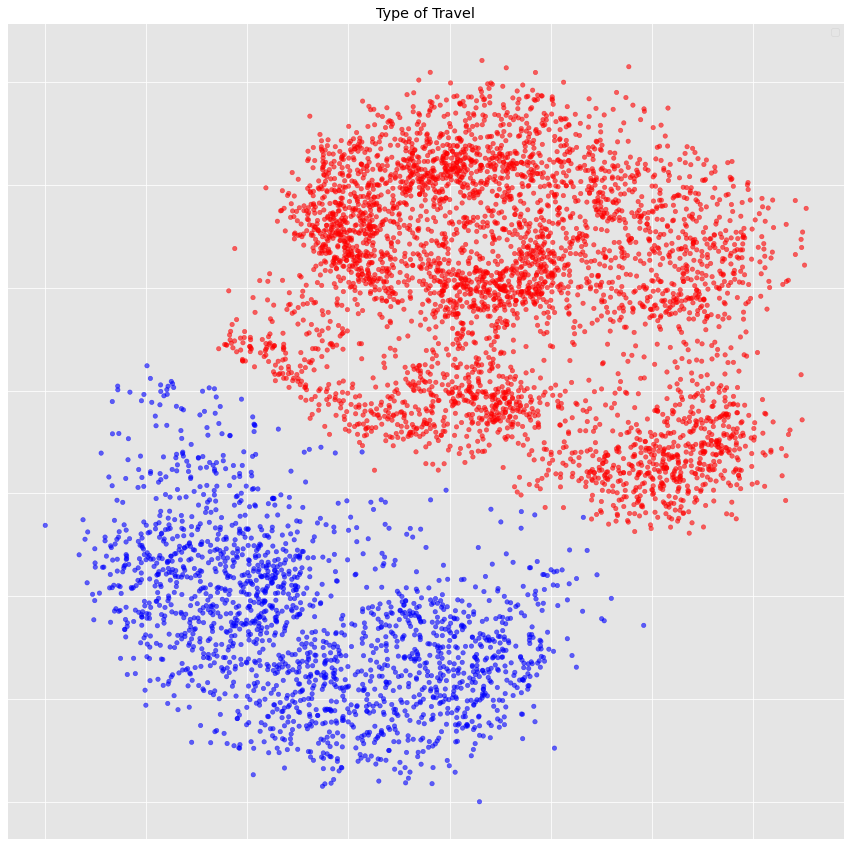

In [22]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Type of Travel')
plt.show()

In [23]:
colmapvar = pd.Series(X['Age']) 
colmapvar = colmapvar.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    elif i[1] == 2:
        color_map.append('green')
    elif i[1] == 3:
        color_map.append('brown')
    else:
        color_map.append('purple')

No handles with labels found to put in legend.


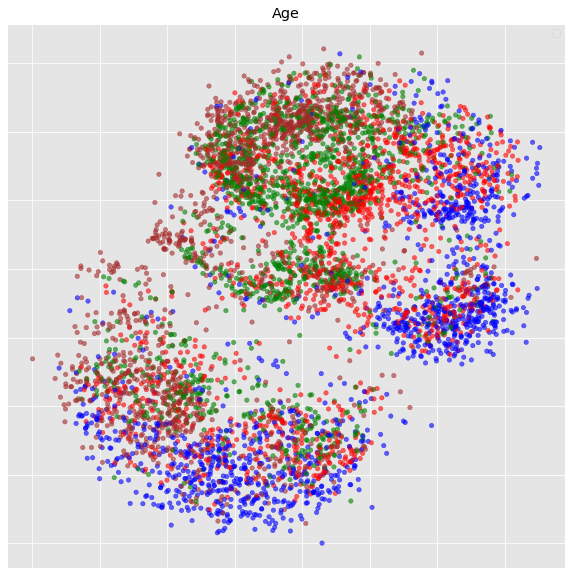

In [24]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Age')
plt.show()

In [25]:
# node2vec
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [26]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

In [27]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

Optimization terminated successfully.
         Current function value: 0.518303
         Iterations 6


In [28]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.2413
Time:                        13:47:43   Log-Likelihood:                -3109.8
converged:                       True   LL-Null:                       -4099.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4275      0.360     -9.526      0.000      -4.133      -2.722
x1             1.9002      0.293      6.495      0.000       1.327       2.474
x2            -2.4439      0.199    -12.296      0.0

In [29]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.7655
-------------------------------------------------------------
Confusion Matrix validation set:
[[2607  816]
 [ 591 1986]]


In [31]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(t,f, test_size = 0.2, shuffle=True)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=20, batch_size=1)

Epoch 1/20
4800/4800 [==============================] - 8s 2ms/step - loss: 0.5932 - accuracy: 0.6989 - val_loss: 0.4993 - val_accuracy: 0.7817
Epoch 2/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5094 - accuracy: 0.7685 - val_loss: 0.4998 - val_accuracy: 0.7800
Epoch 3/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5207 - accuracy: 0.7610 - val_loss: 0.4987 - val_accuracy: 0.7792
Epoch 4/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5229 - accuracy: 0.7628 - val_loss: 0.4986 - val_accuracy: 0.7833
Epoch 5/20
4800/4800 [==============================] - 6s 1ms/step - loss: 0.5284 - accuracy: 0.7592 - val_loss: 0.4985 - val_accuracy: 0.7825
Epoch 6/20
4800/4800 [==============================] - 7s 1ms/step - loss: 0.5186 - accuracy: 0.7653 - val_loss: 0.4979 - val_accuracy: 0.7817
Epoch 7/20
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5204 - accuracy: 0.7545 - val_loss: 0.4984 - val_accuracy:

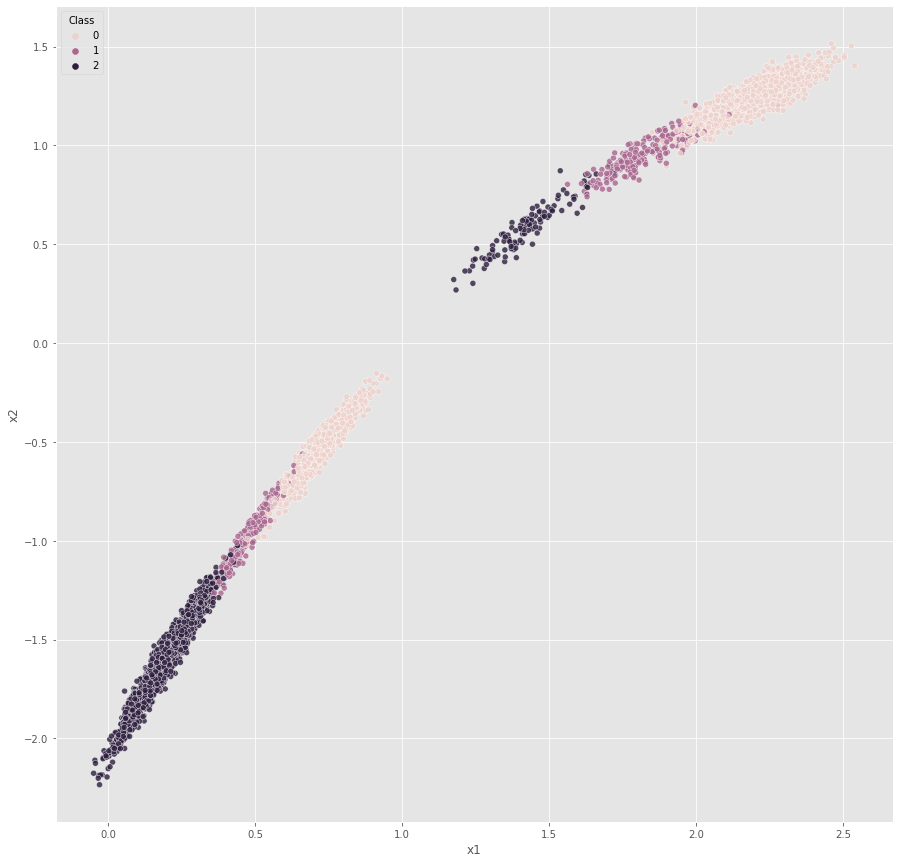

In [33]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=X['Class'],alpha=0.8)
plt.show()

In [307]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['satisfaction'])
#feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.8)
G_dgl.ndata['label'] = torch.tensor(features)

In [308]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [309]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [310]:
train_nodes = (train_mask == True).nonzero(as_tuple=False)
train_nids = torch.reshape(train_nodes,(-1,))
valid_nodes = (valid_mask == True).nonzero(as_tuple=False)
valid_nids = torch.reshape(valid_nodes,(-1,))

In [311]:
len(train_nids)

4755

In [312]:
len(valid_nids)

1245

In [332]:
batch_size = 50
#sampler = dgl.dataloading.MultiLayerNeighborSampler([4, 4, 4])
sampler = dgl.dataloading.MultiLayerNeighborSampler([5, 10])
#sampler = dgl.dataloading.MultiLayerNeighborSampler([None])
train_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, train_nids, sampler,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False,
    num_workers=0
)

In [333]:
example_minibatch = next(iter(train_dataloader))
print(example_minibatch)

[tensor([5650, 1161, 5918,  ..., 5445, 3806, 5202]), tensor([5650, 1161, 5918, 4910, 3304, 4512, 1486, 3156, 1887, 2111, 5791,  664,
        4170, 5503,  507, 4319, 2763, 2946, 4191, 3668, 2005, 5060, 3350, 2559,
        2233, 2468, 3072, 4318, 2357, 2182, 5440, 5388, 3812, 2385, 4361, 5780,
        3909, 5107, 4763, 3126, 1555, 2527, 4093, 3925, 4678, 4604, 5488, 5189,
        5321, 5572]), [Block(num_src_nodes=3129, num_dst_nodes=746, num_edges=3730), Block(num_src_nodes=746, num_dst_nodes=50, num_edges=750)]]


In [334]:
input_nodes, output_nodes, bipartites = example_minibatch
print("To compute {} nodes' output we need {} nodes' input features".format(len(output_nodes), len(input_nodes)))

To compute 50 nodes' output we need 3129 nodes' input features


In [335]:
print(bipartites)

[Block(num_src_nodes=3129, num_dst_nodes=746, num_edges=3730), Block(num_src_nodes=746, num_dst_nodes=50, num_edges=750)]


In [336]:
len(train_nids)

4755

In [337]:
batch_size = len(valid_nids)
valid_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, valid_nids, sampler,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=0
)

In [338]:
def norm(x):
    return F.normalize(x, p=2, dim=-1)

Norm = norm

In [339]:
import tqdm
import sklearn.metrics

class SAGE(nn.Module):
    def __init__(self, in_feats, n_hidden, n_classes, n_layers):
        super().__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.n_classes = n_classes
        self.layers = nn.ModuleList()
        self.layers.append(dglnn.SAGEConv(in_feats, n_hidden, 'lstm', bias=True, feat_drop=0.1))
        for i in range(1, n_layers - 1):
            self.layers.append(dglnn.SAGEConv(n_hidden, n_hidden, 'lstm', bias=True, feat_drop=0.1))
        self.layers.append(dglnn.SAGEConv(n_hidden, n_classes, 'lstm', bias=True, feat_drop=0.1))
        
    def forward(self, bipartites, x):
        for l, (layer, bipartite) in enumerate(zip(self.layers, bipartites)):
            x = layer(bipartite, x)
            if l != self.n_layers - 1:
                x = F.relu(x)
            elif l == self.n_layers - 1:
                x = F.log_softmax(x,dim=1)
        return x

In [340]:
model = SAGE(n_features, 128, n_labels, 2) #n_layers
opt = torch.optim.Adam(model.parameters())

In [341]:
best_accuracy = 0
best_model_path = 'model.pt'
plot_loss_train = []
plot_loss_valid = []
train_acc = []
valid_acc = []

for epoch in range(150):
    model.train()
    loss_epoch = []
    accuracy_epoch = []
    with tqdm.tqdm(train_dataloader) as tq:
        for step, (input_nodes, output_nodes, bipartites) in enumerate(tq):
            bipartites = [b.to(torch.device('cpu')) for b in bipartites]
            inputs = node_features[input_nodes]
            labels = node_labels[output_nodes]
            predictions = model(bipartites, inputs)

            loss = F.cross_entropy(predictions, labels)
            loss_epoch.append(loss.item())
            opt.zero_grad()
            loss.backward()
            opt.step()

            accuracy = sklearn.metrics.accuracy_score(labels.cpu().numpy(), predictions.argmax(1).detach().cpu().numpy())
            accuracy_epoch.append(accuracy.item())
            tq.set_postfix({'loss': '%.03f' % loss.item(), 'acc': '%.03f' % accuracy}, refresh=False)
    plot_loss_train.append(np.mean(loss_epoch))
    train_acc.append(np.mean(accuracy_epoch))
        
    model.eval()
    
    predictions = []
    labels = []
    with tqdm.tqdm(valid_dataloader) as tq, torch.no_grad():
        for input_nodes, output_nodes, bipartites in tq:
            bipartites = [b.to(torch.device('cpu')) for b in bipartites]
            inputs = node_features[input_nodes]
            labels.append(node_labels[output_nodes].numpy())
            predictions.append(model(bipartites, inputs).argmax(1).cpu().numpy())
            valid_pred = model(bipartites, inputs)
            valid_labels = node_labels[output_nodes]
            valid_loss = F.cross_entropy(valid_pred, valid_labels)

        predictions = np.concatenate(predictions)
        labels = np.concatenate(labels)
        
        accuracy = sklearn.metrics.accuracy_score(labels, predictions)
        print('Epoch {} Validation Accuracy {}'.format(epoch, accuracy))
        if best_accuracy < accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), best_model_path)
    valid_acc.append(accuracy.item())
    plot_loss_valid.append(valid_loss.item())


  2%|▏         | 2/96 [00:00<00:06, 15.18it/s, loss=0.387, acc=0.860]

Epoch 0 Validation Accuracy 0.8682730923694779


  1%|          | 1/96 [00:00<00:11,  8.41it/s, loss=0.133, acc=0.940]

Epoch 1 Validation Accuracy 0.885140562248996


  2%|▏         | 2/96 [00:00<00:05, 18.28it/s, loss=0.208, acc=0.920]

Epoch 2 Validation Accuracy 0.8963855421686747


  2%|▏         | 2/96 [00:00<00:06, 15.03it/s, loss=0.285, acc=0.860]

Epoch 3 Validation Accuracy 0.8995983935742972


  2%|▏         | 2/96 [00:00<00:08, 11.25it/s, loss=0.255, acc=0.900]

Epoch 4 Validation Accuracy 0.9108433734939759


  2%|▏         | 2/96 [00:00<00:05, 17.16it/s, loss=0.145, acc=0.940]

Epoch 5 Validation Accuracy 0.9116465863453815


  2%|▏         | 2/96 [00:00<00:07, 12.41it/s, loss=0.197, acc=0.940]

Epoch 6 Validation Accuracy 0.9132530120481928


  2%|▏         | 2/96 [00:00<00:05, 18.52it/s, loss=0.125, acc=0.960]

Epoch 7 Validation Accuracy 0.9172690763052209


  2%|▏         | 2/96 [00:00<00:06, 15.24it/s, loss=0.213, acc=0.940]

Epoch 8 Validation Accuracy 0.9196787148594378


  2%|▏         | 2/96 [00:00<00:05, 16.84it/s, loss=0.215, acc=0.960]

Epoch 9 Validation Accuracy 0.9164658634538153


  2%|▏         | 2/96 [00:00<00:05, 16.73it/s, loss=0.086, acc=0.960]

Epoch 10 Validation Accuracy 0.921285140562249


  2%|▏         | 2/96 [00:00<00:07, 11.77it/s, loss=0.224, acc=0.940]

Epoch 11 Validation Accuracy 0.921285140562249


  2%|▏         | 2/96 [00:00<00:07, 12.77it/s, loss=0.108, acc=0.960]

Epoch 12 Validation Accuracy 0.9204819277108434


  2%|▏         | 2/96 [00:00<00:05, 16.71it/s, loss=0.199, acc=0.880]

Epoch 13 Validation Accuracy 0.9220883534136546


  2%|▏         | 2/96 [00:00<00:05, 16.68it/s, loss=0.116, acc=0.940]

Epoch 14 Validation Accuracy 0.9253012048192771


  2%|▏         | 2/96 [00:00<00:05, 17.68it/s, loss=0.154, acc=0.940]

Epoch 15 Validation Accuracy 0.9244979919678715


  2%|▏         | 2/96 [00:00<00:06, 15.65it/s, loss=0.289, acc=0.880]

Epoch 16 Validation Accuracy 0.9269076305220884


  2%|▏         | 2/96 [00:00<00:05, 16.55it/s, loss=0.198, acc=0.940]

Epoch 17 Validation Accuracy 0.9253012048192771


  2%|▏         | 2/96 [00:00<00:07, 12.87it/s, loss=0.207, acc=0.920]

Epoch 18 Validation Accuracy 0.9285140562248996


  2%|▏         | 2/96 [00:00<00:05, 18.15it/s, loss=0.167, acc=0.900]

Epoch 19 Validation Accuracy 0.9285140562248996


  2%|▏         | 2/96 [00:00<00:05, 18.46it/s, loss=0.220, acc=0.900]

Epoch 20 Validation Accuracy 0.9244979919678715


  2%|▏         | 2/96 [00:00<00:05, 16.98it/s, loss=0.170, acc=0.900]

Epoch 21 Validation Accuracy 0.9301204819277108


  1%|          | 1/96 [00:00<00:11,  8.34it/s, loss=0.339, acc=0.840]

Epoch 22 Validation Accuracy 0.9301204819277108


  2%|▏         | 2/96 [00:00<00:05, 18.43it/s, loss=0.211, acc=0.900]

Epoch 23 Validation Accuracy 0.9325301204819277


  2%|▏         | 2/96 [00:00<00:05, 17.87it/s, loss=0.253, acc=0.900]

Epoch 24 Validation Accuracy 0.927710843373494


  2%|▏         | 2/96 [00:00<00:06, 15.15it/s, loss=0.139, acc=0.960]

Epoch 25 Validation Accuracy 0.9261044176706827


  1%|          | 1/96 [00:00<00:12,  7.77it/s, loss=0.168, acc=0.960]

Epoch 26 Validation Accuracy 0.9317269076305221


  2%|▏         | 2/96 [00:00<00:05, 16.03it/s, loss=0.366, acc=0.820]

Epoch 27 Validation Accuracy 0.9228915662650602


  1%|          | 1/96 [00:00<00:18,  5.22it/s, loss=0.226, acc=0.900]

Epoch 28 Validation Accuracy 0.9293172690763052


  2%|▏         | 2/96 [00:00<00:05, 17.46it/s, loss=0.161, acc=0.920]

Epoch 29 Validation Accuracy 0.9325301204819277


  2%|▏         | 2/96 [00:00<00:05, 17.09it/s, loss=0.086, acc=0.960]

Epoch 30 Validation Accuracy 0.9349397590361446


  2%|▏         | 2/96 [00:00<00:05, 17.55it/s, loss=0.054, acc=0.980]

Epoch 31 Validation Accuracy 0.9301204819277108


  2%|▏         | 2/96 [00:00<00:05, 17.12it/s, loss=0.104, acc=0.960]

Epoch 32 Validation Accuracy 0.9333333333333333


  2%|▏         | 2/96 [00:00<00:06, 15.31it/s, loss=0.176, acc=0.900]

Epoch 33 Validation Accuracy 0.9325301204819277


  2%|▏         | 2/96 [00:00<00:05, 18.10it/s, loss=0.170, acc=0.920]

Epoch 34 Validation Accuracy 0.9349397590361446


  1%|          | 1/96 [00:00<00:14,  6.72it/s, loss=0.117, acc=0.960]

Epoch 35 Validation Accuracy 0.9269076305220884


  2%|▏         | 2/96 [00:00<00:05, 16.87it/s, loss=0.069, acc=0.980]

Epoch 36 Validation Accuracy 0.9269076305220884


  2%|▏         | 2/96 [00:00<00:05, 16.19it/s, loss=0.087, acc=0.980]

Epoch 37 Validation Accuracy 0.9301204819277108


  2%|▏         | 2/96 [00:00<00:08, 11.71it/s, loss=0.203, acc=0.880]

Epoch 38 Validation Accuracy 0.9373493975903614


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch 39 Validation Accuracy 0.934136546184739


  2%|▏         | 2/96 [00:00<00:05, 16.08it/s, loss=0.181, acc=0.920]

Epoch 40 Validation Accuracy 0.9285140562248996


  1%|          | 1/96 [00:00<00:13,  6.98it/s, loss=0.156, acc=0.940]

Epoch 41 Validation Accuracy 0.9365461847389558


  1%|          | 1/96 [00:00<00:10,  8.65it/s, loss=0.084, acc=0.980]

Epoch 42 Validation Accuracy 0.9301204819277108


  1%|          | 1/96 [00:00<00:14,  6.55it/s, loss=0.173, acc=0.920]

Epoch 43 Validation Accuracy 0.9373493975903614


  2%|▏         | 2/96 [00:00<00:08, 10.78it/s, loss=0.088, acc=0.960]

Epoch 44 Validation Accuracy 0.940562248995984


  2%|▏         | 2/96 [00:00<00:06, 15.23it/s, loss=0.182, acc=0.960]

Epoch 45 Validation Accuracy 0.9381526104417671


  2%|▏         | 2/96 [00:00<00:07, 13.18it/s, loss=0.165, acc=0.880]

Epoch 46 Validation Accuracy 0.9317269076305221


  2%|▏         | 2/96 [00:00<00:05, 16.77it/s, loss=0.103, acc=0.960]

Epoch 47 Validation Accuracy 0.940562248995984


  1%|          | 1/96 [00:00<00:18,  5.08it/s, loss=0.074, acc=1.000]

Epoch 48 Validation Accuracy 0.9365461847389558


  2%|▏         | 2/96 [00:00<00:05, 16.44it/s, loss=0.079, acc=1.000]

Epoch 49 Validation Accuracy 0.927710843373494


  1%|          | 1/96 [00:00<00:11,  7.95it/s, loss=0.135, acc=0.960]

Epoch 50 Validation Accuracy 0.9365461847389558


  2%|▏         | 2/96 [00:00<00:05, 17.36it/s, loss=0.143, acc=0.920]

Epoch 51 Validation Accuracy 0.9429718875502008


  2%|▏         | 2/96 [00:00<00:05, 17.36it/s, loss=0.142, acc=0.940]

Epoch 52 Validation Accuracy 0.940562248995984


  2%|▏         | 2/96 [00:00<00:05, 17.38it/s, loss=0.126, acc=0.940]

Epoch 53 Validation Accuracy 0.9461847389558233


  2%|▏         | 2/96 [00:00<00:05, 16.75it/s, loss=0.128, acc=0.920]

Epoch 54 Validation Accuracy 0.9429718875502008


  2%|▏         | 2/96 [00:00<00:06, 14.35it/s, loss=0.119, acc=0.960]

Epoch 55 Validation Accuracy 0.9421686746987952


  2%|▏         | 2/96 [00:00<00:06, 15.62it/s, loss=0.211, acc=0.880]

Epoch 56 Validation Accuracy 0.9413654618473896


  2%|▏         | 2/96 [00:00<00:05, 16.34it/s, loss=0.141, acc=0.940]

Epoch 57 Validation Accuracy 0.9397590361445783


  2%|▏         | 2/96 [00:00<00:05, 17.39it/s, loss=0.159, acc=0.940]

Epoch 58 Validation Accuracy 0.9389558232931727


  2%|▏         | 2/96 [00:00<00:05, 16.59it/s, loss=0.128, acc=0.960]

Epoch 59 Validation Accuracy 0.9437751004016064


  2%|▏         | 2/96 [00:00<00:05, 16.90it/s, loss=0.151, acc=0.960]

Epoch 60 Validation Accuracy 0.9461847389558233


  2%|▏         | 2/96 [00:00<00:06, 15.29it/s, loss=0.066, acc=0.980]

Epoch 61 Validation Accuracy 0.9381526104417671


  1%|          | 1/96 [00:00<00:10,  8.97it/s, loss=0.253, acc=0.920]

Epoch 62 Validation Accuracy 0.9461847389558233


  1%|          | 1/96 [00:00<00:10,  8.93it/s, loss=0.241, acc=0.920]

Epoch 63 Validation Accuracy 0.9437751004016064


  2%|▏         | 2/96 [00:00<00:05, 16.57it/s, loss=0.132, acc=0.960]

Epoch 64 Validation Accuracy 0.946987951807229


  1%|          | 1/96 [00:00<00:15,  6.22it/s, loss=0.126, acc=0.940]

Epoch 65 Validation Accuracy 0.9429718875502008


  2%|▏         | 2/96 [00:00<00:05, 17.26it/s, loss=0.150, acc=0.900]

Epoch 66 Validation Accuracy 0.9437751004016064


  2%|▏         | 2/96 [00:00<00:07, 12.31it/s, loss=0.127, acc=0.960]

Epoch 67 Validation Accuracy 0.944578313253012


  2%|▏         | 2/96 [00:00<00:06, 15.31it/s, loss=0.166, acc=0.960]

Epoch 68 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:06, 15.47it/s, loss=0.090, acc=0.980]

Epoch 69 Validation Accuracy 0.9421686746987952


  2%|▏         | 2/96 [00:00<00:07, 12.93it/s, loss=0.119, acc=0.920]

Epoch 70 Validation Accuracy 0.9437751004016064


  2%|▏         | 2/96 [00:00<00:05, 16.28it/s, loss=0.104, acc=0.960]

Epoch 71 Validation Accuracy 0.946987951807229


  2%|▏         | 2/96 [00:00<00:09, 10.25it/s, loss=0.038, acc=1.000]

Epoch 72 Validation Accuracy 0.9421686746987952


  2%|▏         | 2/96 [00:00<00:05, 15.99it/s, loss=0.044, acc=0.980]

Epoch 73 Validation Accuracy 0.9437751004016064


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch 74 Validation Accuracy 0.9477911646586346


  2%|▏         | 2/96 [00:00<00:05, 15.83it/s, loss=0.079, acc=0.980]

Epoch 75 Validation Accuracy 0.9558232931726908


  2%|▏         | 2/96 [00:00<00:05, 15.98it/s, loss=0.045, acc=0.980]

Epoch 76 Validation Accuracy 0.9365461847389558


  2%|▏         | 2/96 [00:00<00:05, 15.96it/s, loss=0.076, acc=0.980]

Epoch 77 Validation Accuracy 0.9518072289156626


  2%|▏         | 2/96 [00:00<00:05, 16.59it/s, loss=0.126, acc=0.920]

Epoch 78 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 16.10it/s, loss=0.061, acc=0.980]

Epoch 79 Validation Accuracy 0.9381526104417671


  1%|          | 1/96 [00:00<00:14,  6.47it/s, loss=0.357, acc=0.900]

Epoch 80 Validation Accuracy 0.9453815261044177


  2%|▏         | 2/96 [00:00<00:06, 15.00it/s, loss=0.076, acc=1.000]

Epoch 81 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 16.13it/s, loss=0.116, acc=0.940]

Epoch 82 Validation Accuracy 0.9493975903614458


  2%|▏         | 2/96 [00:00<00:05, 15.85it/s, loss=0.119, acc=0.940]

Epoch 83 Validation Accuracy 0.9437751004016064


  1%|          | 1/96 [00:00<00:10,  8.98it/s, loss=0.165, acc=0.980]

Epoch 84 Validation Accuracy 0.9421686746987952


  2%|▏         | 2/96 [00:00<00:06, 14.97it/s, loss=0.183, acc=0.920]

Epoch 85 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 15.73it/s, loss=0.111, acc=0.920]

Epoch 86 Validation Accuracy 0.9421686746987952


  2%|▏         | 2/96 [00:00<00:06, 15.61it/s, loss=0.280, acc=0.920]

Epoch 87 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:05, 15.83it/s, loss=0.339, acc=0.880]

Epoch 88 Validation Accuracy 0.9518072289156626


  2%|▏         | 2/96 [00:00<00:06, 15.65it/s, loss=0.130, acc=0.940]

Epoch 89 Validation Accuracy 0.9453815261044177


  2%|▏         | 2/96 [00:00<00:05, 16.52it/s, loss=0.148, acc=0.960]

Epoch 90 Validation Accuracy 0.9493975903614458


  2%|▏         | 2/96 [00:00<00:05, 16.28it/s, loss=0.111, acc=0.940]

Epoch 91 Validation Accuracy 0.9526104417670683


  2%|▏         | 2/96 [00:00<00:05, 16.23it/s, loss=0.184, acc=0.940]

Epoch 92 Validation Accuracy 0.9453815261044177


  2%|▏         | 2/96 [00:00<00:05, 15.88it/s, loss=0.241, acc=0.920]

Epoch 93 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 15.82it/s, loss=0.241, acc=0.940]

Epoch 94 Validation Accuracy 0.946987951807229


  2%|▏         | 2/96 [00:00<00:06, 15.24it/s, loss=0.080, acc=0.980]

Epoch 95 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 15.99it/s, loss=0.130, acc=0.920]

Epoch 96 Validation Accuracy 0.9534136546184739


  2%|▏         | 2/96 [00:00<00:05, 15.68it/s, loss=0.073, acc=0.980]

Epoch 97 Validation Accuracy 0.9566265060240964


  2%|▏         | 2/96 [00:00<00:05, 16.19it/s, loss=0.108, acc=0.940]

Epoch 98 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:06, 15.17it/s, loss=0.108, acc=0.920]

Epoch 99 Validation Accuracy 0.9502008032128514


  2%|▏         | 2/96 [00:00<00:06, 15.03it/s, loss=0.017, acc=1.000]

Epoch 100 Validation Accuracy 0.9477911646586346


  2%|▏         | 2/96 [00:00<00:07, 12.61it/s, loss=0.119, acc=0.940]

Epoch 101 Validation Accuracy 0.946987951807229


  2%|▏         | 2/96 [00:00<00:05, 16.24it/s, loss=0.198, acc=0.880]

Epoch 102 Validation Accuracy 0.9421686746987952


  2%|▏         | 2/96 [00:00<00:05, 16.15it/s, loss=0.104, acc=0.960]

Epoch 103 Validation Accuracy 0.9518072289156626


  2%|▏         | 2/96 [00:00<00:05, 15.85it/s, loss=0.167, acc=0.920]

Epoch 104 Validation Accuracy 0.9477911646586346


  2%|▏         | 2/96 [00:00<00:05, 15.96it/s, loss=0.059, acc=0.980]

Epoch 105 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 15.92it/s, loss=0.054, acc=0.980]

Epoch 106 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 15.95it/s, loss=0.223, acc=0.920]

Epoch 107 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:06, 15.31it/s, loss=0.130, acc=0.920]

Epoch 108 Validation Accuracy 0.944578313253012


  2%|▏         | 2/96 [00:00<00:05, 15.74it/s, loss=0.079, acc=0.960]

Epoch 109 Validation Accuracy 0.9502008032128514


  2%|▏         | 2/96 [00:00<00:05, 16.28it/s, loss=0.087, acc=0.960]

Epoch 110 Validation Accuracy 0.9502008032128514


  2%|▏         | 2/96 [00:00<00:05, 16.46it/s, loss=0.038, acc=1.000]

Epoch 111 Validation Accuracy 0.9453815261044177


  2%|▏         | 2/96 [00:00<00:05, 15.97it/s, loss=0.186, acc=0.980]

Epoch 112 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:05, 16.32it/s, loss=0.037, acc=1.000]

Epoch 113 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:05, 16.32it/s, loss=0.147, acc=0.940]

Epoch 114 Validation Accuracy 0.9477911646586346


  2%|▏         | 2/96 [00:00<00:06, 14.17it/s, loss=0.082, acc=0.960]

Epoch 115 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:05, 16.12it/s, loss=0.085, acc=0.980]

Epoch 116 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 16.37it/s, loss=0.031, acc=1.000]

Epoch 117 Validation Accuracy 0.946987951807229


  2%|▏         | 2/96 [00:00<00:05, 16.76it/s, loss=0.023, acc=1.000]

Epoch 118 Validation Accuracy 0.9493975903614458


  2%|▏         | 2/96 [00:00<00:05, 16.38it/s, loss=0.120, acc=0.980]

Epoch 119 Validation Accuracy 0.946987951807229


  2%|▏         | 2/96 [00:00<00:05, 16.41it/s, loss=0.055, acc=1.000]

Epoch 120 Validation Accuracy 0.9421686746987952


  2%|▏         | 2/96 [00:00<00:05, 16.53it/s, loss=0.067, acc=0.980]

Epoch 121 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 16.27it/s, loss=0.151, acc=0.980]

Epoch 122 Validation Accuracy 0.9493975903614458


  2%|▏         | 2/96 [00:00<00:05, 16.29it/s, loss=0.094, acc=0.980]

Epoch 123 Validation Accuracy 0.9477911646586346


  2%|▏         | 2/96 [00:00<00:05, 16.09it/s, loss=0.048, acc=1.000]

Epoch 124 Validation Accuracy 0.9493975903614458


  2%|▏         | 2/96 [00:00<00:05, 16.39it/s, loss=0.188, acc=0.920]

Epoch 125 Validation Accuracy 0.9518072289156626


  2%|▏         | 2/96 [00:00<00:05, 16.40it/s, loss=0.148, acc=0.940]

Epoch 126 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 16.53it/s, loss=0.055, acc=0.960]

Epoch 127 Validation Accuracy 0.9453815261044177


  1%|          | 1/96 [00:00<00:09,  9.67it/s, loss=0.113, acc=0.940]

Epoch 128 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:06, 15.44it/s, loss=0.111, acc=0.960]

Epoch 129 Validation Accuracy 0.9550200803212852


  2%|▏         | 2/96 [00:00<00:05, 16.12it/s, loss=0.224, acc=0.940]

Epoch 130 Validation Accuracy 0.9493975903614458


  2%|▏         | 2/96 [00:00<00:06, 14.59it/s, loss=0.041, acc=1.000]

Epoch 131 Validation Accuracy 0.951004016064257


  1%|          | 1/96 [00:00<00:09,  9.99it/s, loss=0.102, acc=0.940]

Epoch 132 Validation Accuracy 0.946987951807229


  2%|▏         | 2/96 [00:00<00:05, 16.62it/s, loss=0.100, acc=0.960]

Epoch 133 Validation Accuracy 0.9485943775100402


  2%|▏         | 2/96 [00:00<00:05, 16.52it/s, loss=0.167, acc=0.940]

Epoch 134 Validation Accuracy 0.9518072289156626


  2%|▏         | 2/96 [00:00<00:05, 16.16it/s, loss=0.084, acc=0.940]

Epoch 135 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:05, 16.81it/s, loss=0.073, acc=0.980]

Epoch 136 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:06, 15.58it/s, loss=0.022, acc=1.000]

Epoch 137 Validation Accuracy 0.946987951807229


  2%|▏         | 2/96 [00:00<00:05, 16.47it/s, loss=0.172, acc=0.920]

Epoch 138 Validation Accuracy 0.9493975903614458


  2%|▏         | 2/96 [00:00<00:05, 15.67it/s, loss=0.066, acc=1.000]

Epoch 139 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:05, 15.81it/s, loss=0.196, acc=0.900]

Epoch 140 Validation Accuracy 0.9534136546184739


  2%|▏         | 2/96 [00:00<00:06, 14.98it/s, loss=0.250, acc=0.940]

Epoch 141 Validation Accuracy 0.9502008032128514


  2%|▏         | 2/96 [00:00<00:08, 11.17it/s, loss=0.024, acc=1.000]

Epoch 142 Validation Accuracy 0.9542168674698795


  2%|▏         | 2/96 [00:00<00:07, 12.04it/s, loss=0.096, acc=0.960]

Epoch 143 Validation Accuracy 0.9566265060240964


  2%|▏         | 2/96 [00:00<00:05, 16.37it/s, loss=0.174, acc=0.940]

Epoch 144 Validation Accuracy 0.9542168674698795


  2%|▏         | 2/96 [00:00<00:05, 16.40it/s, loss=0.075, acc=0.980]

Epoch 145 Validation Accuracy 0.951004016064257


  2%|▏         | 2/96 [00:00<00:06, 15.51it/s, loss=0.094, acc=0.980]

Epoch 146 Validation Accuracy 0.9526104417670683


  2%|▏         | 2/96 [00:00<00:06, 13.50it/s, loss=0.085, acc=0.960]

Epoch 147 Validation Accuracy 0.9550200803212852


  2%|▏         | 2/96 [00:00<00:05, 16.09it/s, loss=0.098, acc=0.960]

Epoch 148 Validation Accuracy 0.9542168674698795


100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

Epoch 149 Validation Accuracy 0.9534136546184739


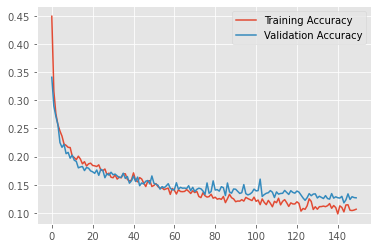

In [342]:
plt.plot(plot_loss_train, label='Training Accuracy')
plt.plot(plot_loss_valid, label='Validation Accuracy')
plt.legend()
plt.show()

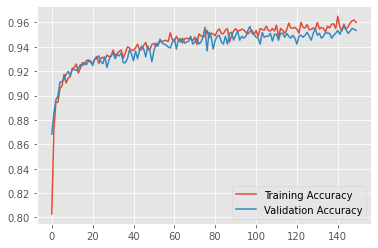

In [343]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.legend()
plt.show()

In [344]:
best_accuracy

0.9566265060240964

In [53]:
df_test = pd.read_csv('test.csv',sep=',')
df_test = df_test.sample(n=6000)
df_test.drop(columns=['Unnamed: 0','id'],inplace=True)
df_test.Gender = df_test.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df_test['Class'] = df_test['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df_test['satisfaction'] = df_test['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [54]:
TEST = df_test.copy(deep=True)

In [55]:
test_gen = TEST[['Gender','Customer Type','Age','Type of Travel','Class']].copy(deep=True)
test_gen.Age = test_gen.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [56]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.20

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [57]:
x = test_gen.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [58]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0

In [59]:
A = A + A.T - np.diag(np.diag(A))

In [60]:
G_test = nx.from_numpy_matrix(A)

In [147]:
test_features = pd.Series(TEST.satisfaction)

In [345]:
G_dgl_test = dgl.from_networkx(G_test)
feat_test = TEST.drop(columns=['satisfaction'])
feat_test = pd.get_dummies(feat_test)
scale = StandardScaler()
feat_test = pd.DataFrame(scale.fit_transform(feat_test))

embedding_test = nn.Parameter(torch.tensor(feat_test.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl_test.ndata['feat'] =  embedding_test
#G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl_test.ndata['label'] = torch.tensor(test_features)

In [346]:
node_features = G_dgl_test.ndata['feat']
node_labels = G_dgl_test.ndata['label']
test_nids = G_dgl_test.nodes()
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [347]:
def inference(model, graph, input_features, batch_size):
    nodes = torch.arange(graph.number_of_nodes())
    
    sampler = dgl.dataloading.MultiLayerNeighborSampler([None])  # one layer at a time, taking all neighbors
    dataloader = dgl.dataloading.NodeDataLoader(
        graph, nodes, sampler,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
        num_workers=0)
    
    with torch.no_grad():
        for l, layer in enumerate(model.layers):
            # Allocate a buffer of output representations for every node
            # Note that the buffer is on CPU memory.
            output_features = torch.zeros(
                graph.number_of_nodes(), model.n_hidden if l != model.n_layers - 1 else model.n_classes)

            for input_nodes, output_nodes, bipartites in tqdm.tqdm(dataloader):
                bipartite = bipartites[0].to(torch.device('cpu'))

                x = input_features[input_nodes]

                # the following code is identical to the loop body in model.forward()
                x = layer(bipartite, x)
                if l != model.n_layers - 1:
                    x = F.relu(x)
                    
                elif l == model.n_layers - 1:
                    x = F.log_softmax(x,dim=1)

                output_features[output_nodes] = x.cpu()
            input_features = output_features
    return output_features

In [348]:
model.load_state_dict(torch.load('model.pt'))
all_predictions = inference(model, G_dgl_test, node_features, 6000)

100%|██████████| 1/1 [00:50<00:00, 50.57s/it]


In [349]:
test_predictions = all_predictions[test_nids].argmax(1)
test_labels = node_labels[test_nids]
test_accuracy = sklearn.metrics.accuracy_score(test_predictions.numpy(), test_labels.numpy())
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9401666666666667


In [350]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Classification Accuracy test set {}'.format(accuracy_score(test_labels.numpy(),test_predictions.numpy())))
print('-------------------------------------------------------------')
print('Confusion Matrix test set:')
print(confusion_matrix(test_labels.numpy(),test_predictions.numpy()))

Classification Accuracy test set 0.9401666666666667
-------------------------------------------------------------
Confusion Matrix test set:
[[3295   67]
 [ 292 2346]]


In [352]:
from sklearn import svm

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.2, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9591666666666666
0.93


In [353]:
xx = TEST.drop(columns=['satisfaction'])
scale = StandardScaler()
xx = pd.DataFrame(scale.fit_transform(xx))
yy = TEST.satisfaction

In [354]:
svm_y_test = np.empty((len(yy),1))

for i in range(len(yy)):
    if yy.iloc[i] == 1:
        svm_y_test[i] = 1
    else:
        svm_y_test[i] = -1

svm_y_test.astype(int)

array([[ 1],
       [ 1],
       [-1],
       ...,
       [-1],
       [ 1],
       [-1]])

In [355]:
print(clf.score(xx, svm_y_test))

0.9348333333333333
